Pytorch provide the object called ```torch.tensor``` which is almost the same as ```np.array``` except that it is differentiable.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Derivatives

## 1.1 Derivatives

You are given $ y = 2x^3+x $.

Calculate $\frac{d y}{d x}$ at $x=1$.

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x**3 + x

print(x,y)

tensor(1., requires_grad=True) tensor(3., grad_fn=<AddBackward0>)


In [ ]:
y.backward()

In [ ]:
x.grad

tensor(7.)

In [ ]:
print(x)
print(x.data)
print(x.grad)

tensor(1., requires_grad=True)
tensor(1.)
tensor(7.)


* Caution 1: you cannot calculate ```y.backward()``` again.

In [ ]:
# y.backward()
# Saved intermediate values of the graph are freed when you call .backward() or autograd.grad().
# Specify retain_graph=True if you need to backward through the graph a second time or
# if you need to access saved tensors after calling backward.

* Caution 2: If you calculate ```y=2*x**3 _x``` and calculate ```y.backward()``` again, then derivatives are accumumated.

In [ ]:
y = 2 * x**3 + x
y.backward()
x.grad # derivative is doubled: 7 + 7 = 14

tensor(14.)

## How to avoid the accumulation of derivatives?

Use `x.grad=None`.

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x**3 + x
y.backward()
print(x.grad)
y = 2 * x**3 + x
x.grad=None
y.backward()
print(x.grad)


tensor(7.)
tensor(7.)


## Example 1.1.1:

Calculate $\frac{d}{d x} \cos(x)$ at $x=\pi/3$.

## 1.2 Transform Tensor to Numpy
* `requires_grads=True`인 tensor는 tensor를 바로 .numpy() 로 변환 불가능  
* `.detach().numpy()` 로 변환 가능

In [ ]:
a = torch.tensor([1.0,2.0,3.0,12.0])
b = a.numpy()
print(a)
print(b)
b

tensor([ 1.,  2.,  3., 12.])
[ 1.  2.  3. 12.]


array([ 1.,  2.,  3., 12.], dtype=float32)

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# np.sum(x) # error
np.sum(x.detach().numpy())

6.0

## 1.3. Partial Derivates

Calculate partial derivative  $u$ of the following function where $u=2$ and $v=1$:

$ f(u,v)=uv+(uv)^2$:

In other words, calculate

$\nabla f(1, 2)$.


In [ ]:
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)

f = u*v+(u*v)**2
f.backward()
print(u.grad, v.grad)

tensor(5.) tensor(10.)


You can do the same thing with vector $u=(u_1, u_2)$ with

$f(u_1, u_2)= u_1*u_2 +(u_1*u_2)**2$

In [ ]:
u = torch.tensor([2.0, 1.0], requires_grad=True)
f= u[0]*u[1] + (u[0]*u[1])**2
f.backward()
u.grad

tensor([ 5., 10.])

### Example 1.3.1:
You are given

$y=\exp(2x_1)+x_2^2$.

Calculate $\triangledown y = \left( \frac{\delta y}{\delta x_1},
\frac{\delta y}{\delta x_2} \right)$ at $x_1=1.0$ and $x_2=2.0$.

## 1.4. Gradient descent with Pytorch

You want to minimize the following function using gradient descent algorithm.

$f(x_1, x_2)=(x_1-3)^2 +2.4(x_2-5)^2 +10$.

Your algorithm for the gradneitn descent algorithm is as follows with learning rate lr$=0.1$.

1. Let's start with $x^{[0]}=(x_1^{[0]}, x_2^{[0]})=(7.0, 3.0)$.

2. Update  $x^{[1]} = x^{[0]} - {\rm lr} \cdot \triangledown f(x^{[0]})$

3. Keep updating until converge

In [ ]:
import torch

x = torch.tensor([7.0, 3.0], requires_grad=True)
y = (x[0]-3)**2+2.4*(x[1]-5)**2+10

In [ ]:
epochs=30
history = []
lr = 0.1

for epoch in range(epochs):
  x.grad=None
  y = (x[0]-3)**2+2.4*(x[1]-5)**2+10
  y.backward()
  x.data = x.data - lr * x.grad
  print(x.data)
  history.append(y.item())

tensor([6.2000, 3.9600])
tensor([5.5600, 4.4592])
tensor([5.0480, 4.7188])
tensor([4.6384, 4.8538])
tensor([4.3107, 4.9240])
tensor([4.0486, 4.9605])
tensor([3.8389, 4.9794])
tensor([3.6711, 4.9893])
tensor([3.5369, 4.9944])
tensor([3.4295, 4.9971])
tensor([3.3436, 4.9985])
tensor([3.2749, 4.9992])
tensor([3.2199, 4.9996])
tensor([3.1759, 4.9998])
tensor([3.1407, 4.9999])
tensor([3.1126, 4.9999])
tensor([3.0901, 5.0000])
tensor([3.0721, 5.0000])
tensor([3.0576, 5.0000])
tensor([3.0461, 5.0000])
tensor([3.0369, 5.0000])
tensor([3.0295, 5.0000])
tensor([3.0236, 5.0000])
tensor([3.0189, 5.0000])
tensor([3.0151, 5.0000])
tensor([3.0121, 5.0000])
tensor([3.0097, 5.0000])
tensor([3.0077, 5.0000])
tensor([3.0062, 5.0000])
tensor([3.0050, 5.0000])


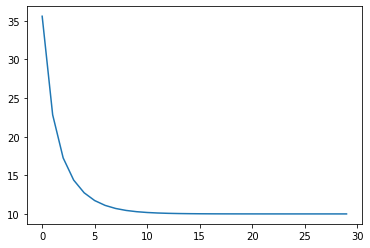

In [ ]:
plt.plot(history)

In [ ]:
x.data

tensor([3.0050, 5.0000])

## Example 1.4.1

You want to derive the solution of the following equation

$0=x^2+2x+1$

using optimization. Answer the following questions.

1. Write the proper loss function.
2. Use gradient descent algorighm to find the solution of the optimization problem

## Example 1.4.2:

You are given

$\theta \,|\, x_1, \cdots, x_n \sim {\rm Gamma}({\rm shape}=2.0, {\rm rate}=1.3)   $.

Find $\theta_0$ such that $P(\theta<\theta_0)=0.95$ as an optimization problem.

Hint: There is no cdf available for Gamma distribution in Pytorch (it is available in Tensorflow though). Alternatively, you may integrate gamma pdf with ```torch.trapezoid``` function to create cdf. You may start with defining cdf function for Gamma distribution.



In [ ]:
m = torch.distributions.Gamma(torch.tensor([1.0]), torch.tensor([1.0]))
m.sample()  # Gamma distributed with concentration=shape=1 and rate=1
torch.exp(m.log_prob(2.0))

tensor([0.1353])

In [ ]:
?torch.distributions.Gamma

In [ ]:
# Actually, cdf can be easily calculated from the corresponding method.
# m.cdf(torch.tensor(0.9))

tensor([0.5934])

In [ ]:
def cdf(q):
  x=torch.linspace(0.000001, 1, 1000)*q
  y=torch.exp(m.log_prob(x))
  return torch.trapezoid(y, x)

In [ ]:
m.icdf(0.9) # not implemented

NotImplementedError: ignored

In [ ]:
qq = torch.tensor(2.0, requires_grad=True)
y = cdf(qq)
y.backward()
qq.grad

tensor(0.1353)

In [ ]:
epochs=10000
history=[]
lr=0.2

x0 = torch.tensor(2.0, requires_grad=True)
for epoch in range(epochs):
  x0.grad=None
  loss = (cdf(x0)-0.95)**2
  loss.backward()
  x0.data = x0.data - lr*x0.grad
  history.append(loss.item())


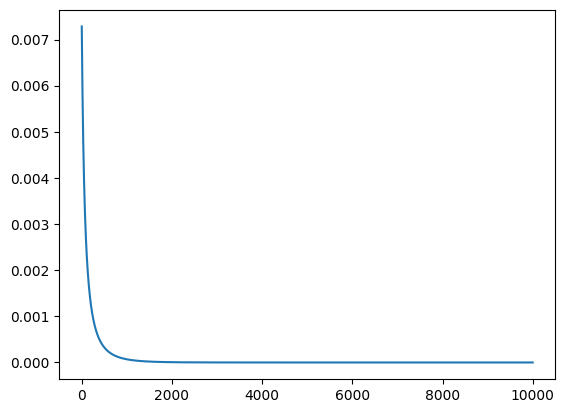

In [ ]:
plt.plot(history)

In [ ]:
cdf(x0)

tensor(0.9500, grad_fn=<DivBackward1>)

# 2. Stochastic Gradient Descent

## 2.1 Simple linear regression with "full batch" gradient descent.

You are given $X$ and $Y$. Using the linear regression, you want to have the following model

$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X$

by minimizing the following square loss

$$L_n(\beta)=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\widehat{y}_i)^2$$

where $\widehat{y}_i = \beta_0+\beta_1 x_i$ and $n=20$.


Follow the following steps to do linear regression.

1. Reshape $X$ into the shape of $[20,2]$ and name it as $XX$.

2. Using, `torch.tensor`, define $\beta:=(\beta_0, \beta_1)$ ready to calculate derivatives.

3. Define $\widehat{Y}$ of size $[20,1]$ using $XX$ and $\beta$.

4. Then, using gradient descent, find $\widehat{\beta}$ which minimizes $L_n(\beta)$.

5. Track the learning process.




In [ ]:
X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [ ]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

In [ ]:
import matplotlib.pyplot as plt
X.shape

torch.Size([20])

In [ ]:
Ones = torch.ones([X.shape[0]])
XX = torch.stack([Ones, X ], axis=1)
XX

tensor([[ 1.0000e+00, -3.0000e+00],
        [ 1.0000e+00, -2.7000e+00],
        [ 1.0000e+00, -2.4000e+00],
        [ 1.0000e+00, -2.1000e+00],
        [ 1.0000e+00, -1.8000e+00],
        [ 1.0000e+00, -1.5000e+00],
        [ 1.0000e+00, -1.2000e+00],
        [ 1.0000e+00, -9.0000e-01],
        [ 1.0000e+00, -6.0000e-01],
        [ 1.0000e+00, -3.0000e-01],
        [ 1.0000e+00, -2.3842e-08],
        [ 1.0000e+00,  3.0000e-01],
        [ 1.0000e+00,  6.0000e-01],
        [ 1.0000e+00,  9.0000e-01],
        [ 1.0000e+00,  1.2000e+00],
        [ 1.0000e+00,  1.5000e+00],
        [ 1.0000e+00,  1.8000e+00],
        [ 1.0000e+00,  2.1000e+00],
        [ 1.0000e+00,  2.4000e+00],
        [ 1.0000e+00,  2.7000e+00]])

In [ ]:
epochs=1000
history=[]
lr=0.01

beta = torch.tensor([[2.0], [-3.0]], requires_grad=True)
for epoch in range(epochs):
  beta.grad=None
  loss = torch.mean((Y-XX@beta)**2)
  loss.backward()
  beta.data = beta.data - lr*beta.grad
  print(beta.data, loss.data)
  history.append(loss.item())

tensor([[ 1.9222],
        [-2.8088]]) tensor(51.8141)
tensor([[ 1.8465],
        [-2.6293]]) tensor(47.6733)
tensor([[ 1.7729],
        [-2.4609]]) tensor(43.9873)
tensor([[ 1.7013],
        [-2.3029]]) tensor(40.7041)
tensor([[ 1.6316],
        [-2.1546]]) tensor(37.7774)
tensor([[ 1.5637],
        [-2.0155]]) tensor(35.1666)
tensor([[ 1.4976],
        [-1.8849]]) tensor(32.8357)
tensor([[ 1.4332],
        [-1.7625]]) tensor(30.7529)
tensor([[ 1.3705],
        [-1.6476]]) tensor(28.8900)
tensor([[ 1.3093],
        [-1.5398]]) tensor(27.2222)
tensor([[ 1.2497],
        [-1.4387]]) tensor(25.7275)
tensor([[ 1.1916],
        [-1.3439]]) tensor(24.3865)
tensor([[ 1.1350],
        [-1.2549]]) tensor(23.1819)
tensor([[ 1.0797],
        [-1.1715]]) tensor(22.0987)
tensor([[ 1.0258],
        [-1.0933]]) tensor(21.1233)
tensor([[ 0.9732],
        [-1.0200]]) tensor(20.2439)
tensor([[ 0.9219],
        [-0.9513]]) tensor(19.4499)
tensor([[ 0.8718],
        [-0.8868]]) tensor(18.7319)
tensor([[ 

tensor([[-1.4362e+00],
        [ 2.4073e-04]]) tensor(9.7535)
tensor([[-1.4363e+00],
        [ 2.3597e-04]]) tensor(9.7535)
tensor([[-1.4364e+00],
        [ 2.3130e-04]]) tensor(9.7535)
tensor([[-1.4364e+00],
        [ 2.2673e-04]]) tensor(9.7535)
tensor([[-1.4365e+00],
        [ 2.2224e-04]]) tensor(9.7535)
tensor([[-1.4365e+00],
        [ 2.1785e-04]]) tensor(9.7535)
tensor([[-1.4366e+00],
        [ 2.1354e-04]]) tensor(9.7535)
tensor([[-1.4367e+00],
        [ 2.0932e-04]]) tensor(9.7535)
tensor([[-1.4367e+00],
        [ 2.0518e-04]]) tensor(9.7535)
tensor([[-1.4368e+00],
        [ 2.0112e-04]]) tensor(9.7535)
tensor([[-1.4368e+00],
        [ 1.9714e-04]]) tensor(9.7535)
tensor([[-1.4369e+00],
        [ 1.9324e-04]]) tensor(9.7535)
tensor([[-1.4369e+00],
        [ 1.8942e-04]]) tensor(9.7535)
tensor([[-1.4370e+00],
        [ 1.8567e-04]]) tensor(9.7535)
tensor([[-1.4370e+00],
        [ 1.8200e-04]]) tensor(9.7535)
tensor([[-1.4371e+00],
        [ 1.7840e-04]]) tensor(9.7535)
tensor([

tensor([[-1.4395e+00],
        [ 2.8712e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.8043e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.7395e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.6773e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.6166e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.5534e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.4944e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.4268e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.3671e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.3074e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.2514e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.1954e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.1465e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.1027e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.0588e-07]]) tensor(9.7535)
tensor([[-1.4395e+00],
        [ 2.0150e-07]]) tensor(9.7535)
tensor([

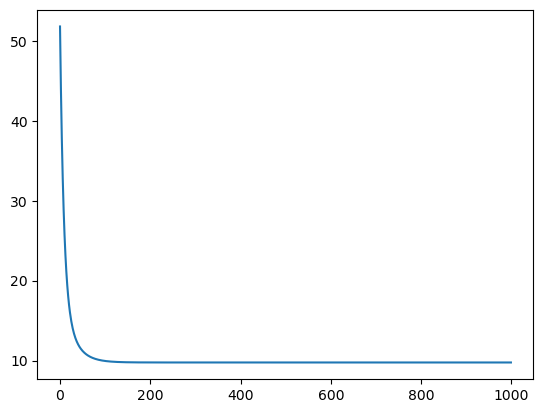

In [ ]:
plt.plot(history)

So far so good, it seems that learning curve is reasonable. Now, take a look at $\widehat{\beta}$.

In [ ]:
beta

tensor([[-1.4395e+00],
        [ 1.4198e-07]], requires_grad=True)

Some thing weng to wrong?

In [ ]:
Yhat = XX@beta
Yhat

tensor([[-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395],
        [-1.4395]], grad_fn=<MmBackward0>)

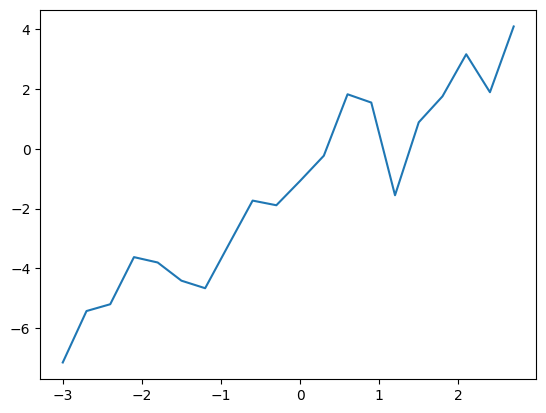

In [ ]:
plt.plot(X, Y)

Clearly something went to wrong...

## 2.2 Simple linear regression with "minibatch" gradient descent.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

dataset = TensorDataset(XX,Y)
trainloader=DataLoader(dataset = dataset, batch_size=5, shuffle=True)

Using the above `dataset` and `trainloader`, do minibatch gradient descent. First, start with the full batch learning.

In [ ]:
epochs=100
history=[]
lr=0.1

beta = torch.tensor([[1.0], [1.0]], requires_grad=True)
for epoch in range(epochs):
    for xx,yy in trainloader:
        beta.grad=None
        loss = torch.mean((Y-XX@beta)**2)
        loss.backward()
        beta.data = beta.data - lr*beta.grad
        print(beta.data, loss.data)
        history.append(loss.item())